# **Cardio Good Fitness Case Study -Descriptive Statistics**

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store at any time in the past three months. The data is stored in the **CardioGoodFitness.csv** file.

**Objective**

Perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

**Data Dictionary**

The team identified the following customer variables to study:

- Product: Product purchased - TM195, TM498, or TM798
- Gender: Male or Female
- Age: Age of the customer in years
- Education: Education of the customer in years
- MaritalStatus: Single or partnered
- Income: Annual household income
- Usage: The average number of times the customer plans to use the treadmill each week;
- Miles: The average number of miles the customer expects to walk/run each week;
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.

**Questions to explore**
1. What are the different types of variables in the data?
2. What is the distribution of different variables in the data?
3. Which product is more popular among males or females?
4. Is the product purchase affected by the marital status of the customer?
5. Is there a significant correlation among some of the variables?
6. What is the distribution of the average number of miles for each product?

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

In [2]:
df = pd.read_csv("/content/sample_data/CardioGoodFitness.csv")

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Usage'}>,
        <Axes: title={'center': 'Fitness'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Miles'}>]], dtype=object)

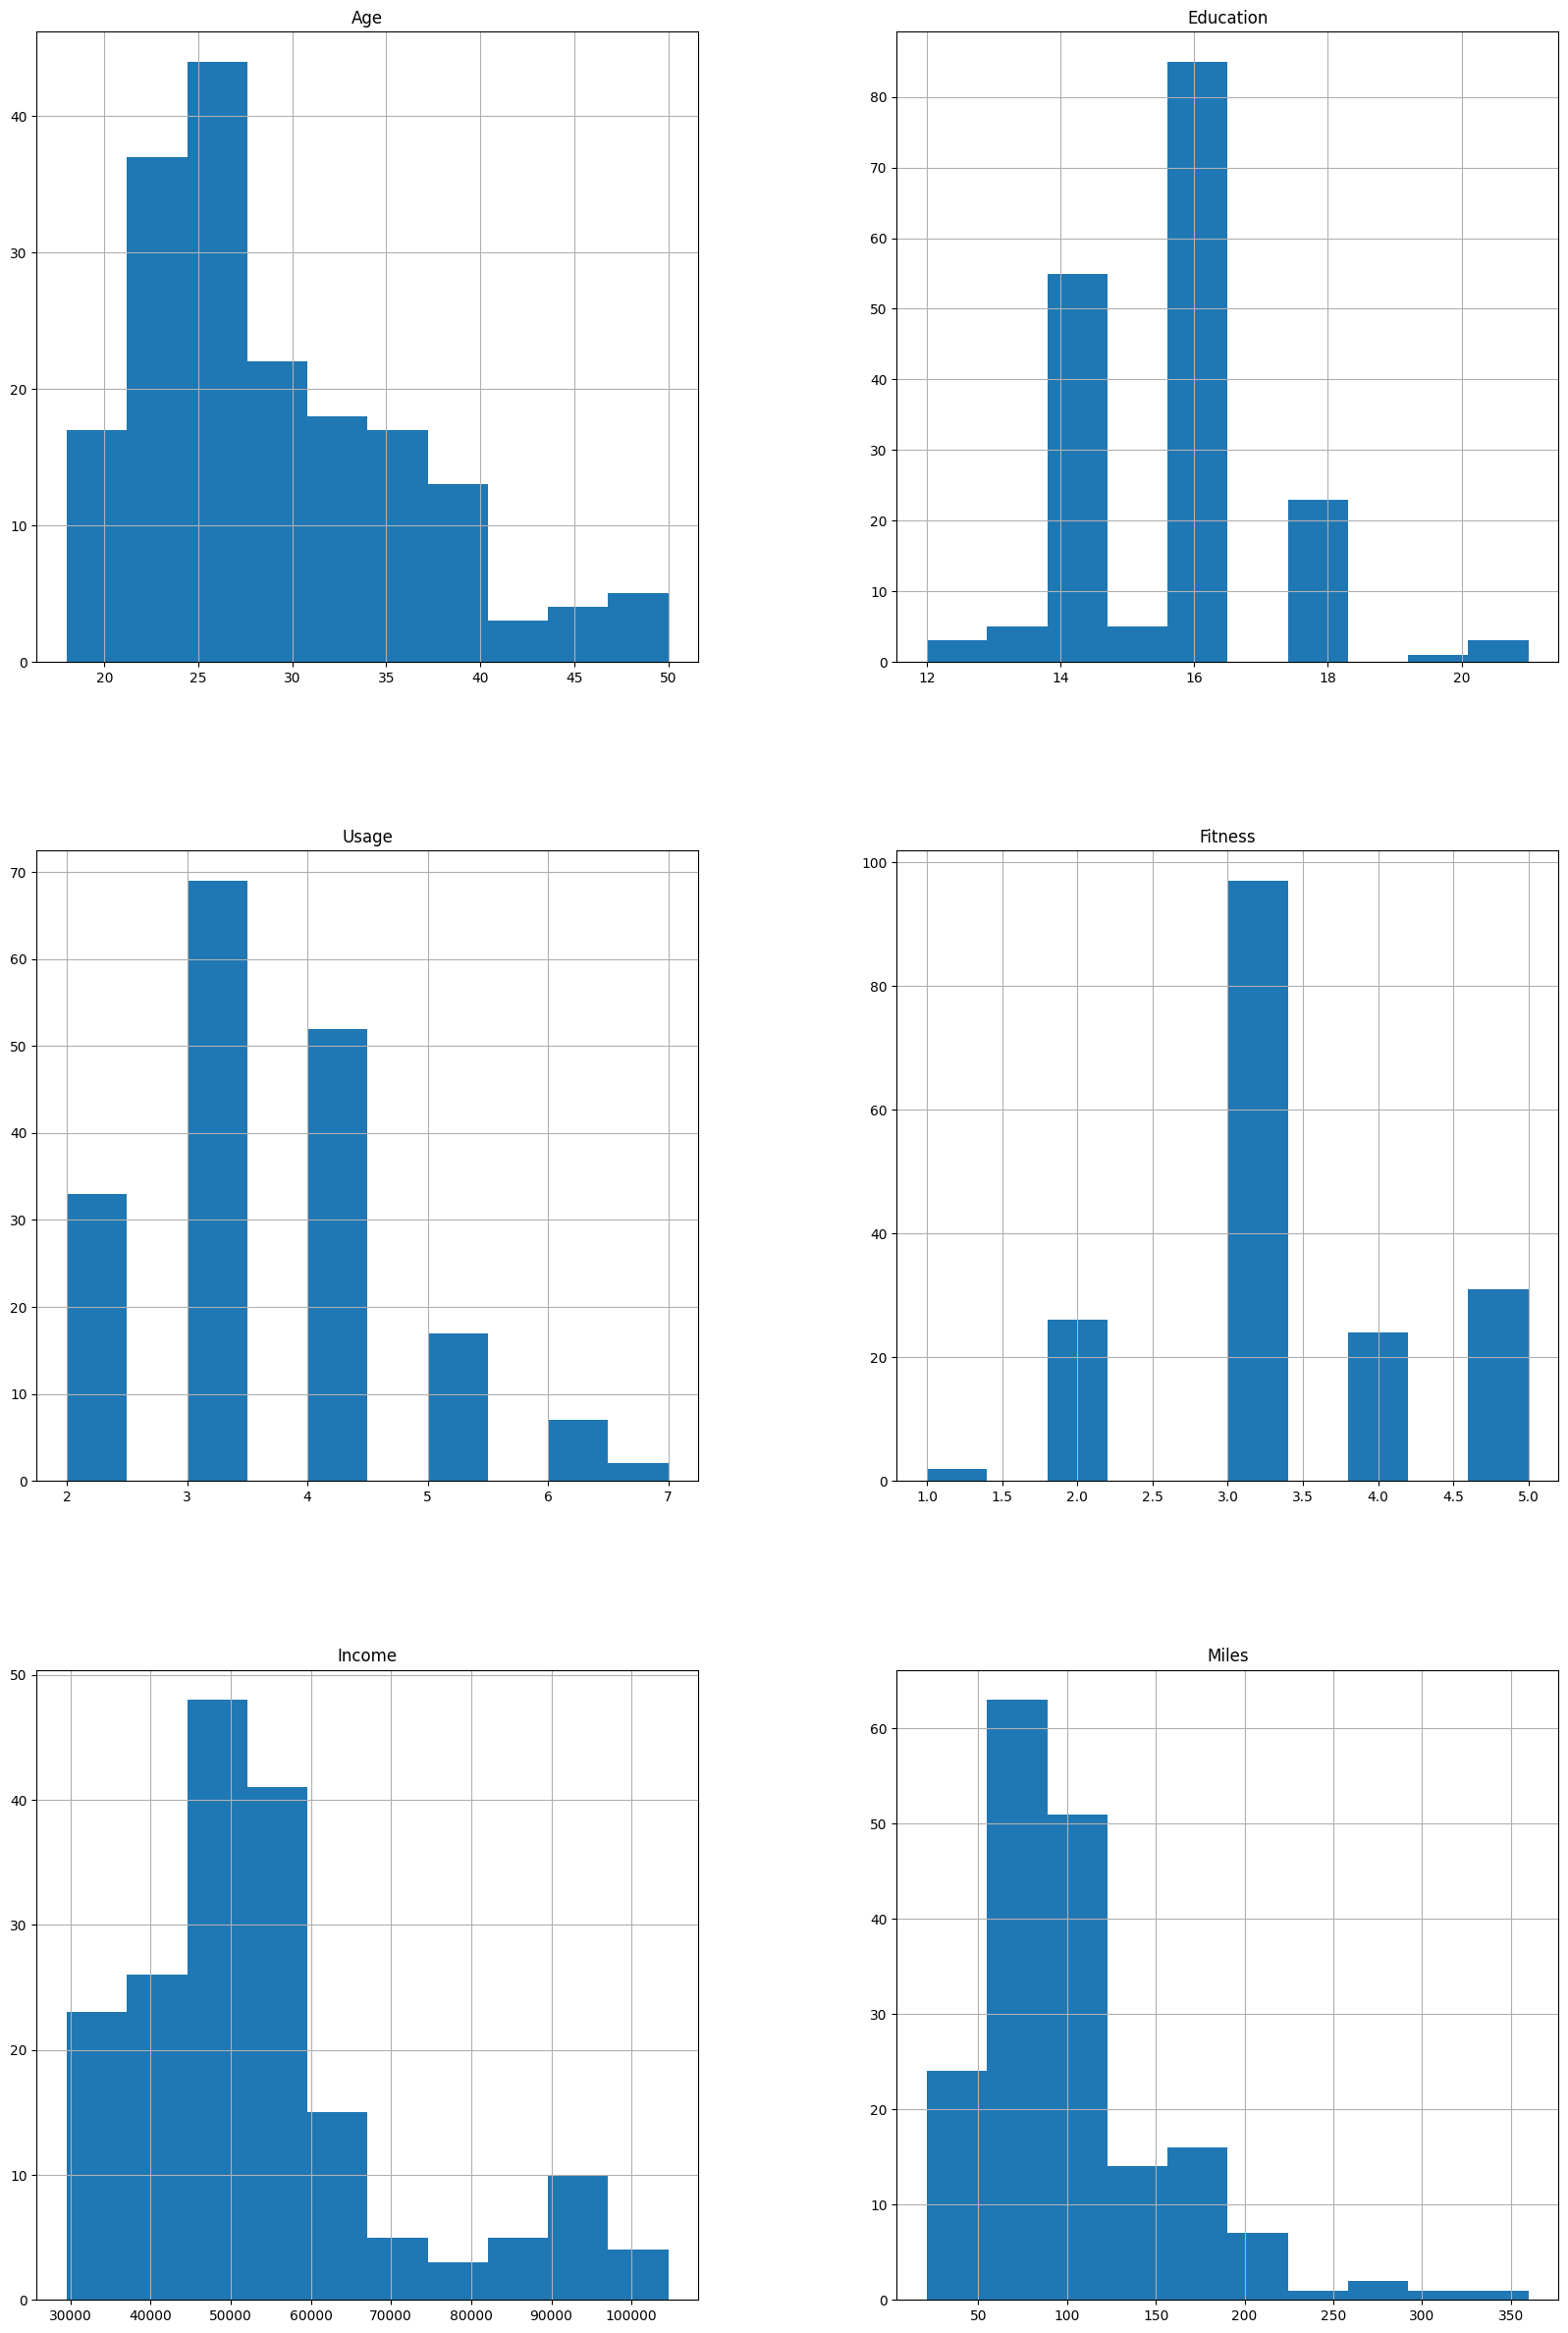

In [8]:
df.hist(figsize=(20,30))

<ipython-input-12-6cb68f06f6af>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Gender" , y = "Age", palette="bright")


<Axes: xlabel='Gender', ylabel='Age'>

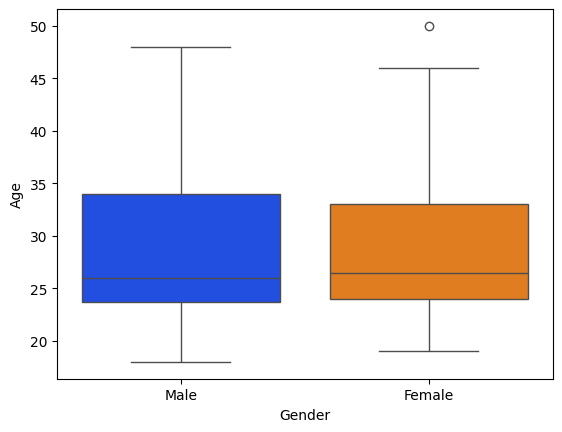

In [12]:
sns.boxplot(data=df, x="Gender" , y = "Age", palette="bright")

<Axes: xlabel='Product', ylabel='Age'>

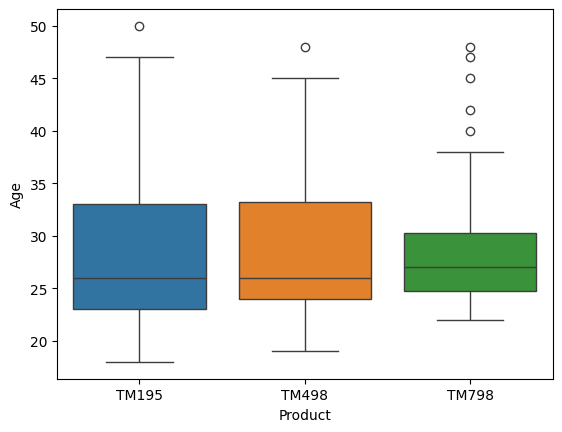

In [14]:
sns.boxplot(data=df, x="Product" , y = "Age", hue = "Product")

In [15]:
pd.crosstab(df["Product"], df["Gender"])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


<Axes: xlabel='Product', ylabel='count'>

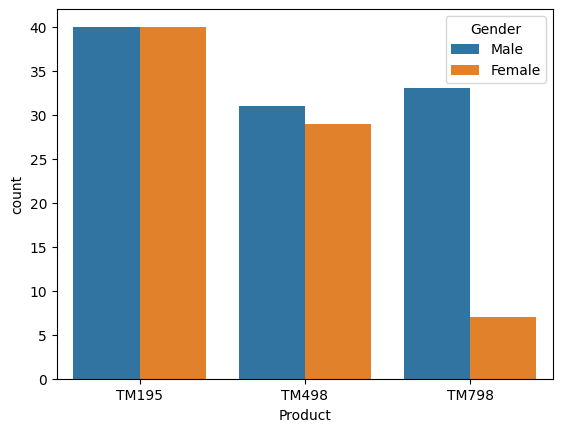

In [17]:
sns.countplot(data=df, x="Product", hue="Gender")

In [35]:
pd.pivot_table(df, index=["Product"], columns= ["MaritalStatus"], aggfunc="count")

Age        Education          Fitness           Gender  \
MaritalStatus Partnered Single Partnered Single Partnered Single Partnered   
Product                                                                      
TM195                48     32        48     32        48     32        48   
TM498                36     24        36     24        36     24        36   
TM798                23     17        23     17        23     17        23   

                        Income            Miles            Usage         
MaritalStatus Single Partnered Single Partnered Single Partnered Single  
Product                                                                  
TM195             32        48     32        48     32        48     32  
TM498             24        36     24        36     24        36     24  
TM798             17        23     17        23     17        23     17

In [22]:
pd.pivot_table(df,"Income", index=["Product","Gender"], columns= ["MaritalStatus"])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [23]:
pd.pivot_table(df,"Miles", index=["Product","Gender"], columns= ["MaritalStatus"])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

In [38]:
pd.pivot_table(df,"Miles", index=["Product"])

,Miles
Product,
TM195,82.787500
TM498,87.933333
TM798,166.900000


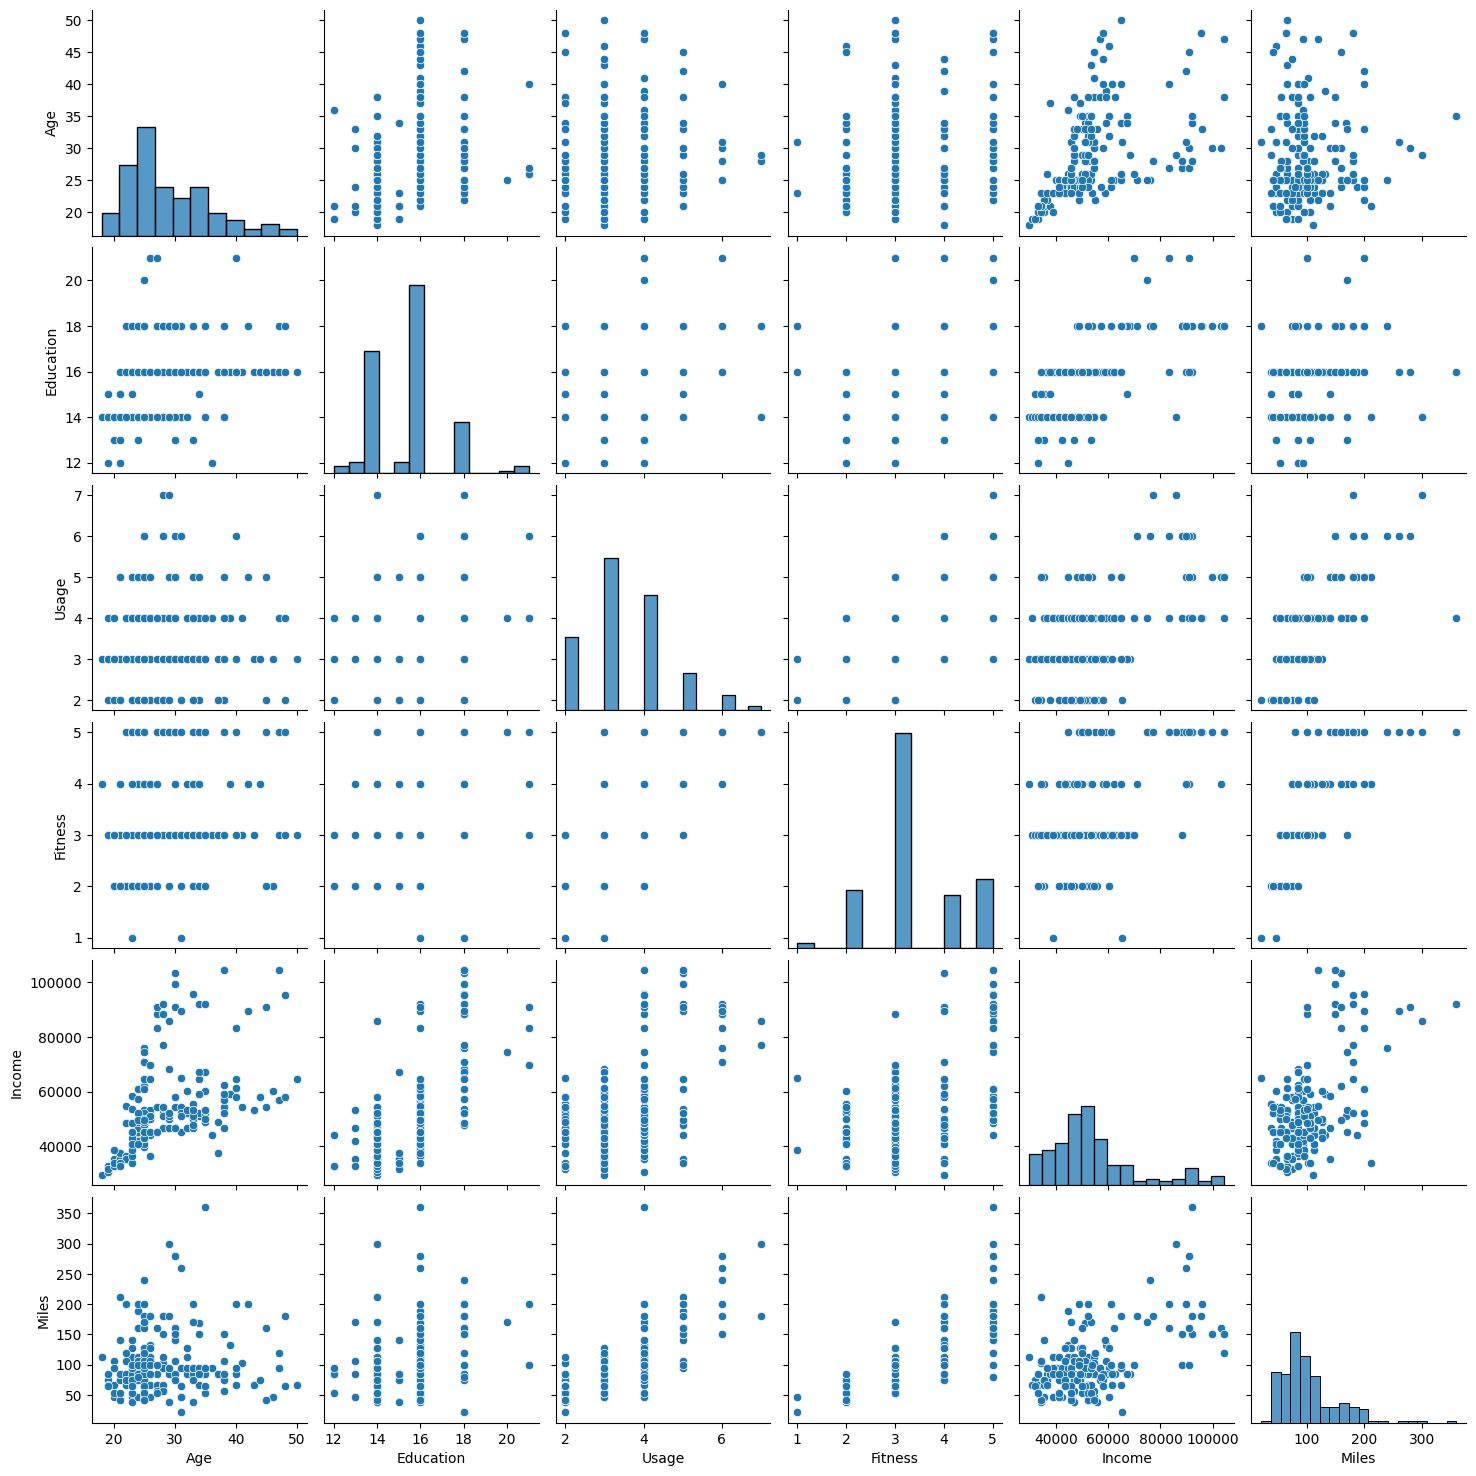

In [24]:
sns.pairplot(df)

In [25]:
df["Age"].std()

6.943498135399795

In [27]:
df["Age"].mean()

np.float64(28.788888888888888)

<ipython-input-26-36da03057c7d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

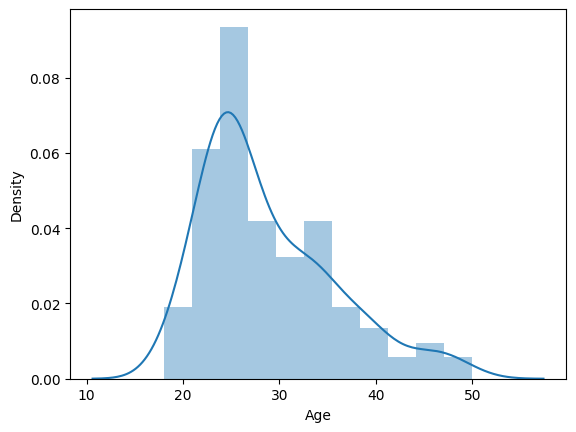

In [26]:
sns.distplot(df["Age"])

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

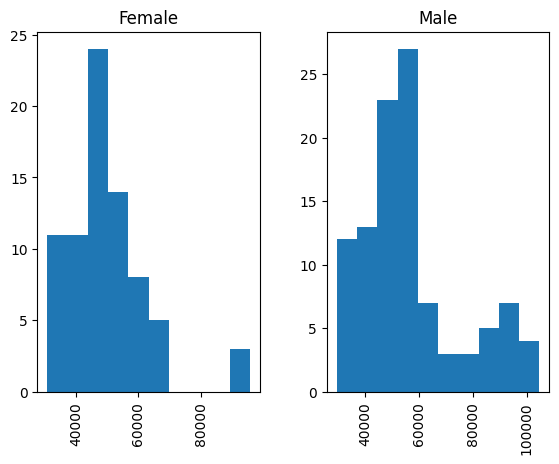

In [28]:
df.hist(by = "Gender", column= "Income")

array([[<Axes: title={'center': 'TM195'}>,
        <Axes: title={'center': 'TM498'}>],
       [<Axes: title={'center': 'TM798'}>, <Axes: >]], dtype=object)

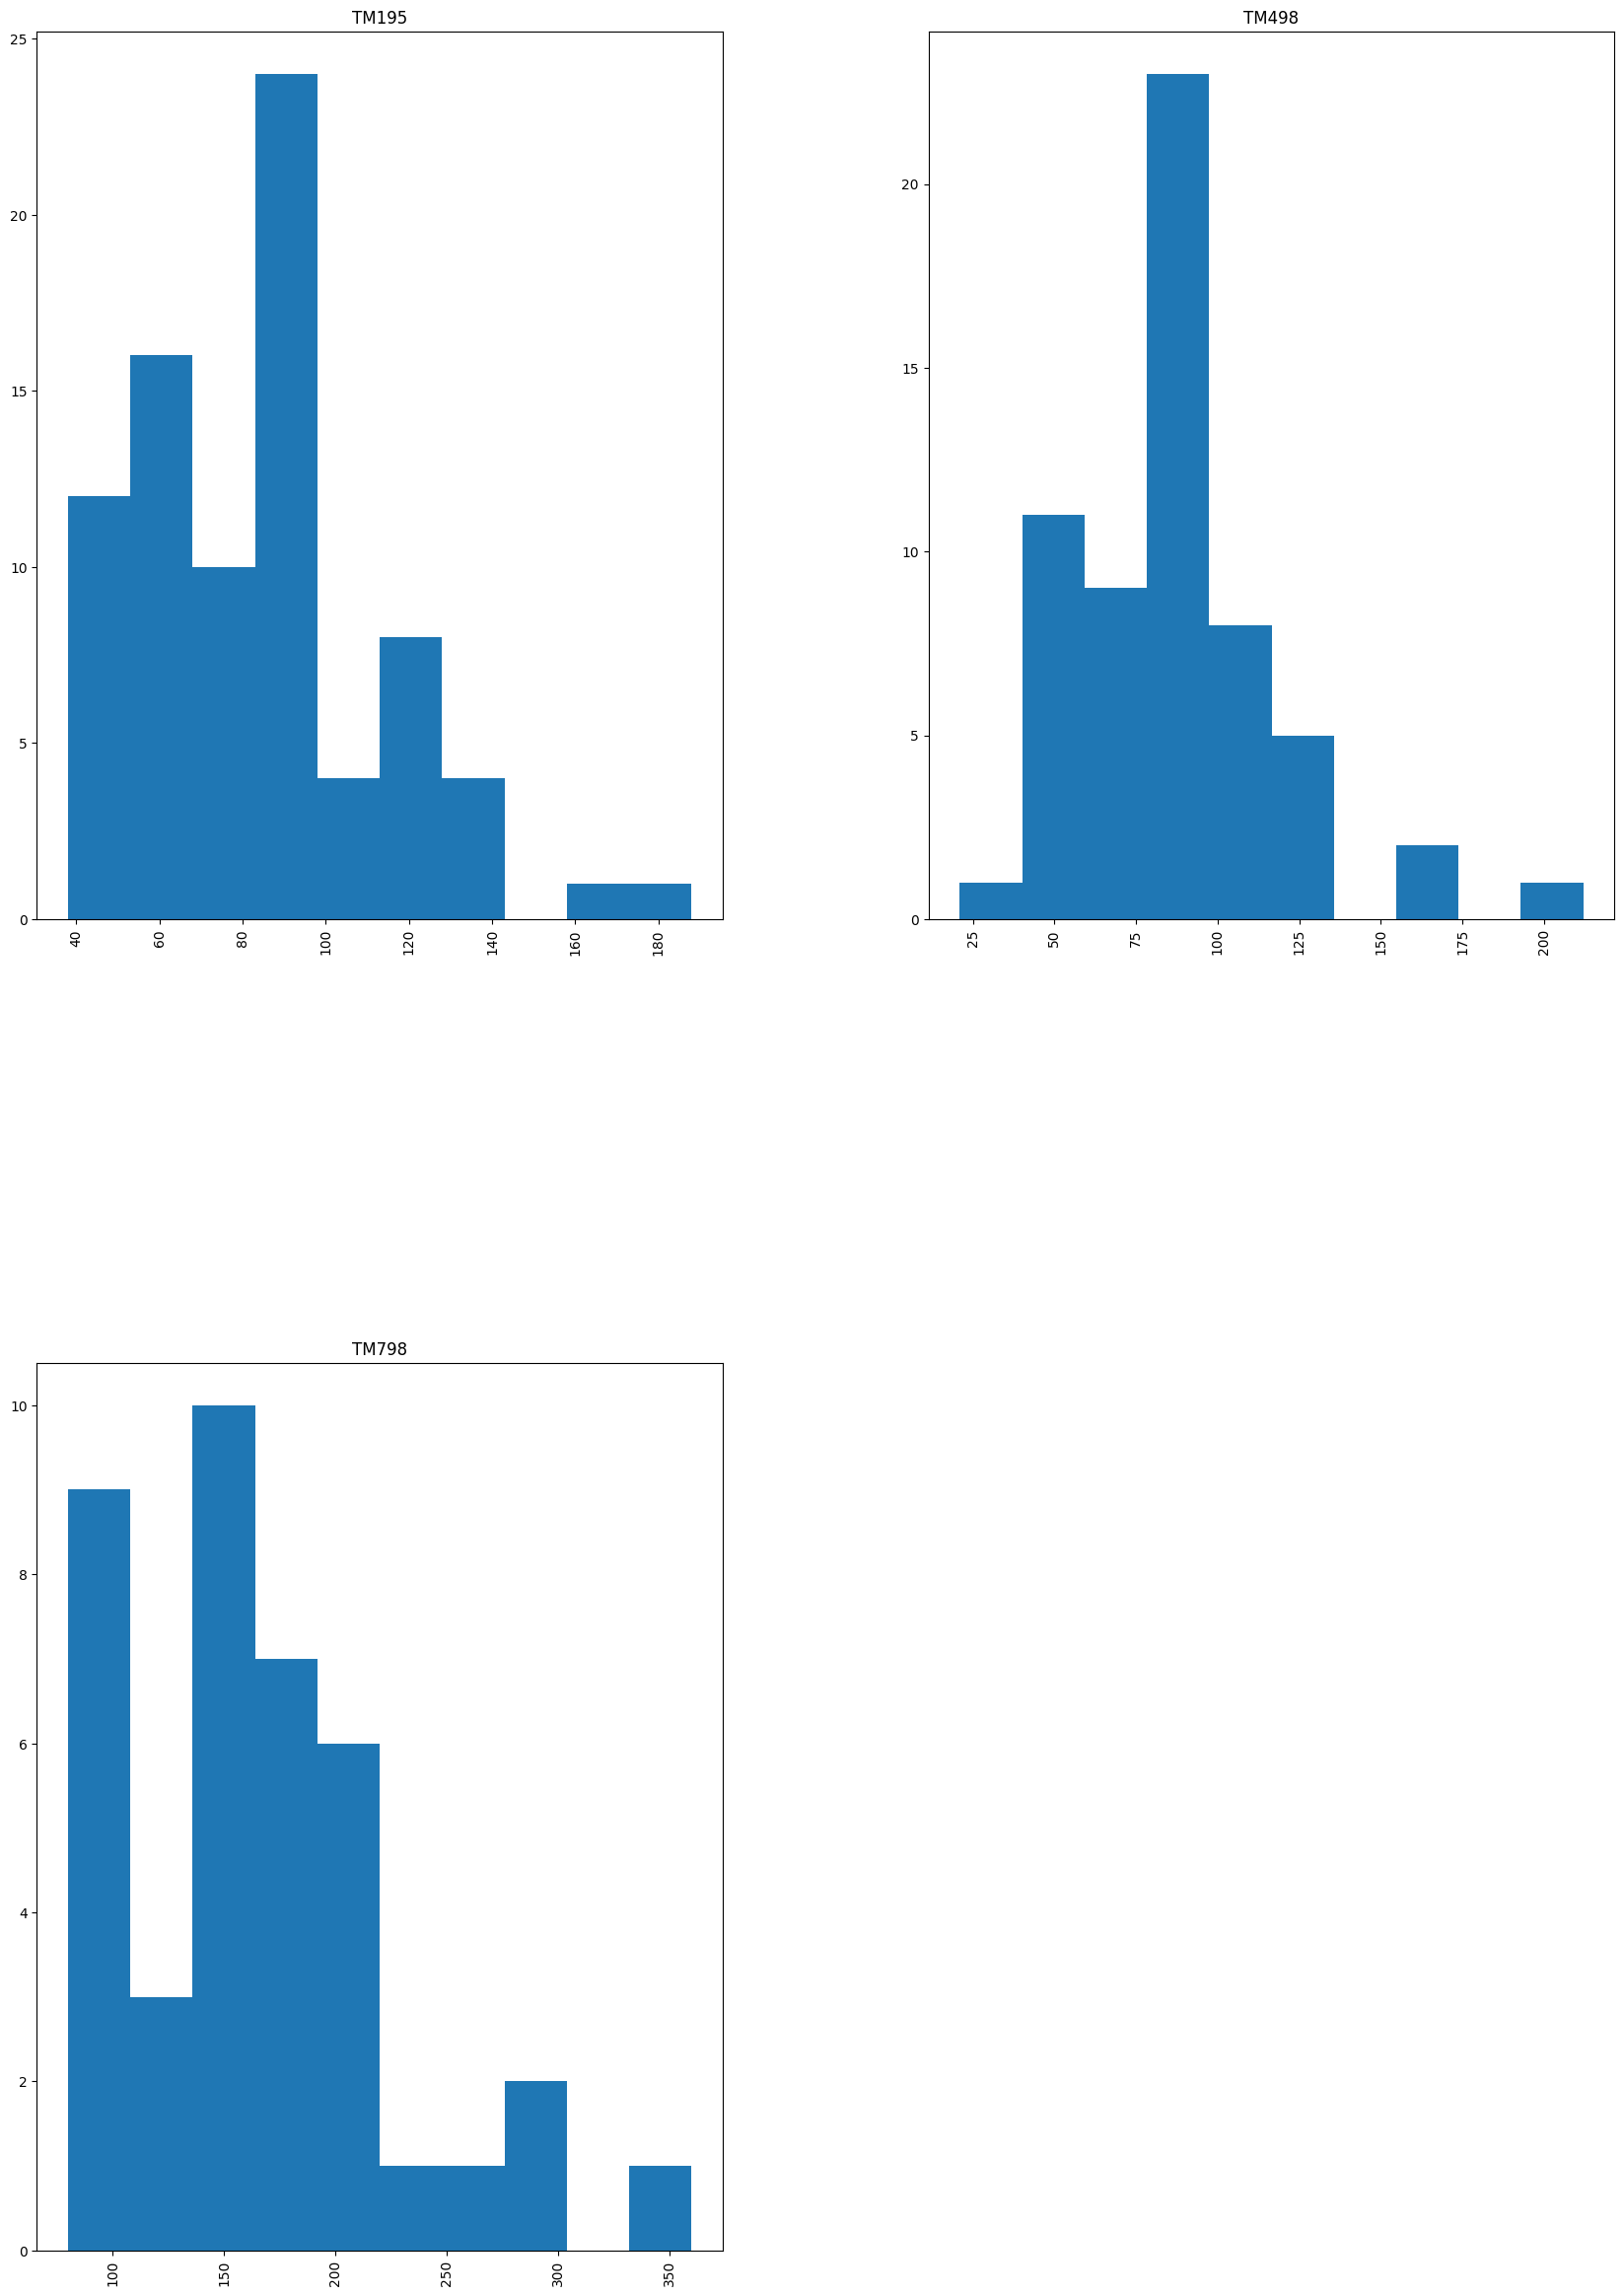

In [29]:
df.hist(by = "Product", column= "Miles", figsize=(20,30))

In [31]:
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

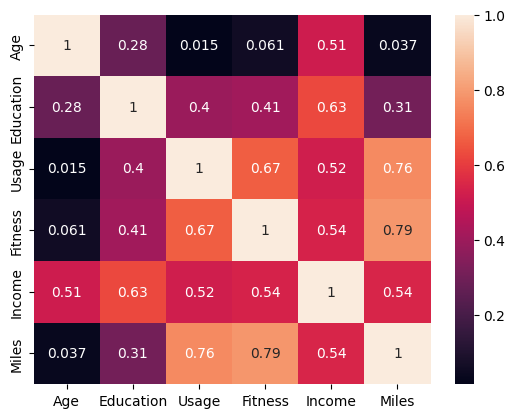

In [32]:
sns.heatmap(corr , annot = True)

# Conclusion

1. Which product is more popular among males or females?

TM195 is the most popular product among males and females

2. Is the product purchase affected by the marital status of the customer?

Yes, partnered users are more likely to purchase.

3. Is there a significant correlation among some of the variables?

There is a big correlation among the level of Fitness, Usage and Miles.
If the user consider itself with a good fitness level, the usage and Miles are higher too.

4. What is the distribution of the average number of miles for each product?

TM195 has a mean of 82 Miles
TM498 has a mean of 87.9 Miles
TM798 has a mean of 166.9 Miles